In [1]:
from pandas_datareader import data, wb
import pandas as pd
import requests
import json
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import dateparser
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
def dateparse (time):    
    return dateparser.parse(time)


df = pd.read_csv('./1004_10.csv', header = None, index_col = 0,parse_dates=True,date_parser=dateparse, squeeze = True);

# df.to_datetime(df.index, unit='s')
s=pd.Series(df, name='Bitcoin Price (USD)')
s.index.name='Date'
s.reset_index()
bitcoin_prices=pd.DataFrame(s)
bitcoin_prices.head()

/opt/conda/lib/python3.6/site-packages/tzlocal/unix.py:177: UserWarning: Can not find any timezone configuration, defaulting to UTC.
  warnings.warn("Can not find any timezone configuration, defaulting to UTC.")


,Bitcoin Price (USD)
Date,
2021-10-10 23:00:00,54659.00
2021-10-10 22:00:00,54913.45
2021-10-10 21:00:00,54801.07
2021-10-10 20:00:00,55429.80
2021-10-10 19:00:00,55450.25


In [3]:
s=pd.Series(df, name='Bitcoin Price (USD)')
s.index.name='Date'
s.reset_index()
bitcoin_prices=pd.DataFrame(s)
bitcoin_prices.head()

,Bitcoin Price (USD)
Date,
2021-10-10 23:00:00,54659.00
2021-10-10 22:00:00,54913.45
2021-10-10 21:00:00,54801.07
2021-10-10 20:00:00,55429.80
2021-10-10 19:00:00,55450.25


In [4]:
bitcoin_prices.index.hour

Int64Index([23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
            ...
             8,  7,  6,  5,  4,  3,  2,  1,  0, 23],
           dtype='int64', name='Date', length=169)

<AxesSubplot:xlabel='Date'>

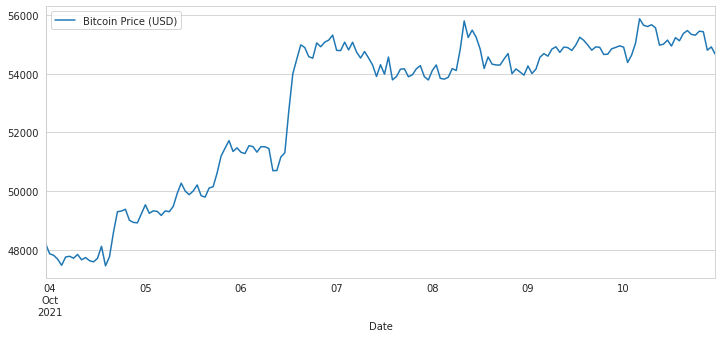

In [5]:
bitcoin_prices.plot(figsize=(12,5))

In [6]:
bitcoin_prices.describe()

,Bitcoin Price (USD)
count,169.000000
mean,52826.869349
std,2645.100267
min,47450.660000
25%,50269.350000
50%,54167.170000
75%,54891.320000
max,55873.060000


In [7]:
#投報率
bitcoin_prices['returns']=bitcoin_prices/bitcoin_prices.shift(1)
bitcoin_prices['log_returns']=np.log(bitcoin_prices['returns'])

<AxesSubplot:xlabel='Date'>

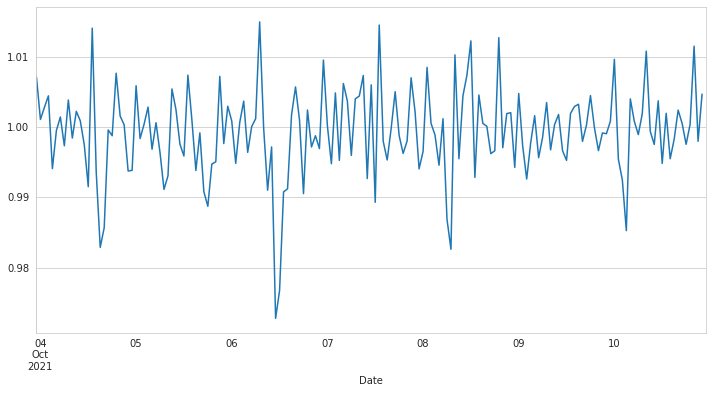

In [8]:
bitcoin_prices['returns'].plot(kind='line',figsize=(12,6))

In [9]:
m=loc=bitcoin_prices['log_returns'][1:].mean()
s=loc=bitcoin_prices['log_returns'][1:].std()

In [10]:
stats.normaltest(bitcoin_prices['log_returns'], nan_policy='omit')

NormaltestResult(statistic=23.41722565810798, pvalue=8.222692654027595e-06)

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

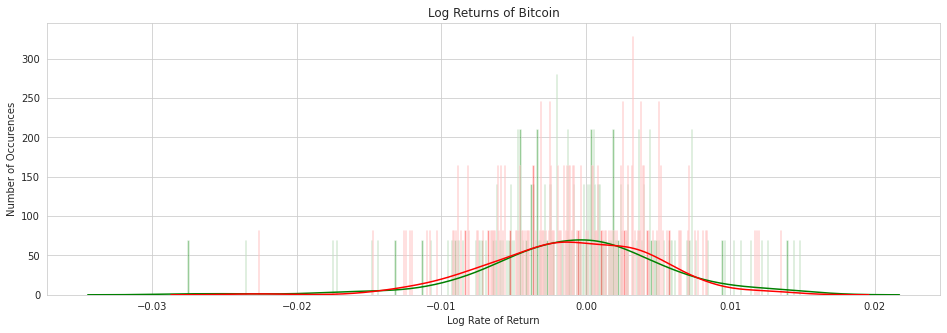

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s,len(bitcoin_prices)-1), color='red', bins=500)
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [12]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.065634476369065, pvalue=0.4453604860424748)

In [13]:
from statsmodels.stats.diagnostic import lilliefors

In [14]:
lilliefors(bitcoin_prices['log_returns'][1:])

(0.065634476369065, 0.1016897296967833)

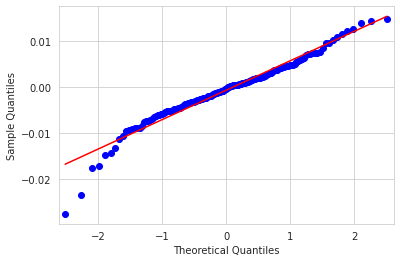

In [15]:
plt.show(sm.qqplot(bitcoin_prices['log_returns'][1:],line='s'))

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

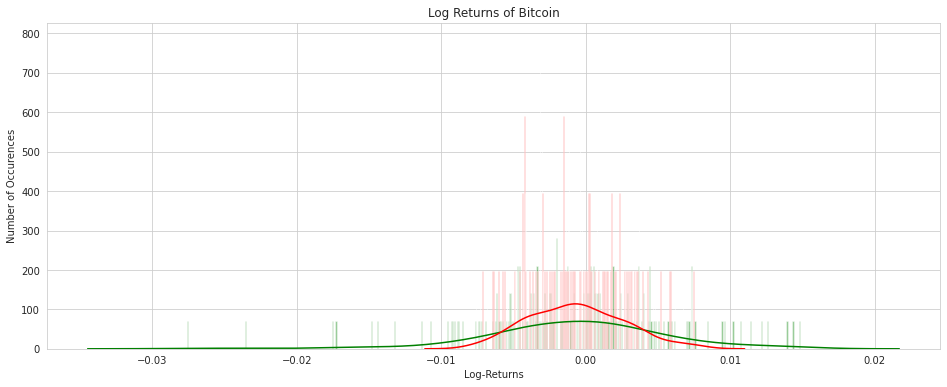

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s/2,len(bitcoin_prices['log_returns'])-1), color='red', bins=500)
plt.xlabel('Log-Returns')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [17]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)*2/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.1419253647385158, pvalue=0.0020466324553658115)

In [18]:
bitcoin_prices.index=pd.to_datetime(bitcoin_prices.index)

In [20]:
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns
Date,,,
2021-10-24 23:00:00,60852.22,NaN,NaN
2021-10-24 22:00:00,60917.04,1.001065,0.001065
2021-10-24 21:00:00,60977.21,1.000988,0.000987
2021-10-24 20:00:00,61166.71,1.003108,0.003103
2021-10-24 19:00:00,60643.09,0.991439,-0.008597


In [21]:
type(bitcoin_prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [22]:
bitcoin_prices.dropna(subset=['returns', 'log_returns'], inplace=True)
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns
Date,,,
2021-10-24 22:00:00,60917.04,1.001065,0.001065
2021-10-24 21:00:00,60977.21,1.000988,0.000987
2021-10-24 20:00:00,61166.71,1.003108,0.003103
2021-10-24 19:00:00,60643.09,0.991439,-0.008597
2021-10-24 18:00:00,60114.62,0.991286,-0.008753


In [23]:
bitcoin_prices.describe()

,Bitcoin Price (USD),returns,log_returns
count,168.000000,168.000000,168.000000
mean,62535.426369,1.000086,0.000066
std,1713.267175,0.006298,0.006311
min,59859.970000,0.974769,-0.025555
25%,61132.182500,0.997033,-0.002971
50%,62193.935000,1.000554,0.000554
75%,63782.332500,1.003394,0.003388
max,66875.830000,1.019642,0.019452


In [24]:
# standard_deviations=bitcoin_prices.groupby([bitcoin_prices.index.date,bitcoin_prices.index.hour]).std()

In [25]:
# standard_deviations.index.names=['Day','Hour']

In [26]:
# standard_deviations.head()

In [27]:
from sklearn import cluster

In [28]:
X =np.asarray(bitcoin_prices['returns']).reshape(-1,1)

In [29]:
distortions=[]
for k in range(2,20):
    distortions.append(cluster.KMeans(n_clusters=k).fit(X).inertia_)

In [30]:
print(distortions)

[0.0031730181026430634, 0.0017563092301388023, 0.0010945019217728671, 0.0006518199116762548, 0.0004470627951785848, 0.00034046004622140355, 0.0002451143261411193, 0.00017824482134264674, 0.00012749976644913262, 0.00010788849787604994, 8.870816891548931e-05, 7.525071600632042e-05, 6.547752302360413e-05, 5.206210401636542e-05, 4.5571890319723166e-05, 3.9551365016419496e-05, 3.406572905207642e-05, 2.83252792491336e-05]


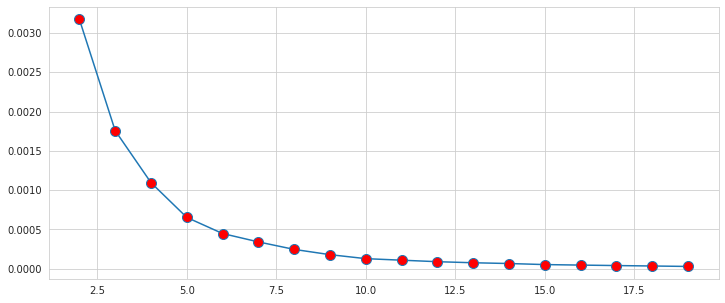

In [31]:
plt.figure(figsize=(12,5))
plt.plot(range(2,20), distortions, marker='o', markerfacecolor='red', markersize=10)

In [32]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [33]:
print(kmeans.cluster_centers_)

[[0.99826183]
 [1.01208312]
 [1.00343528]
 [0.99084325]
 [0.97729681]]


In [34]:
bitcoin_prices['cluster_center']=list(map(lambda x: kmeans.cluster_centers_[x][0], kmeans.predict(X)))

In [35]:
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns,cluster_center
Date,,,,
2021-10-24 22:00:00,60917.04,1.001065,0.001065,1.003435
2021-10-24 21:00:00,60977.21,1.000988,0.000987,1.003435
2021-10-24 20:00:00,61166.71,1.003108,0.003103,1.003435
2021-10-24 19:00:00,60643.09,0.991439,-0.008597,0.990843
2021-10-24 18:00:00,60114.62,0.991286,-0.008753,0.990843


Text(0, 0.5, 'Volatility')

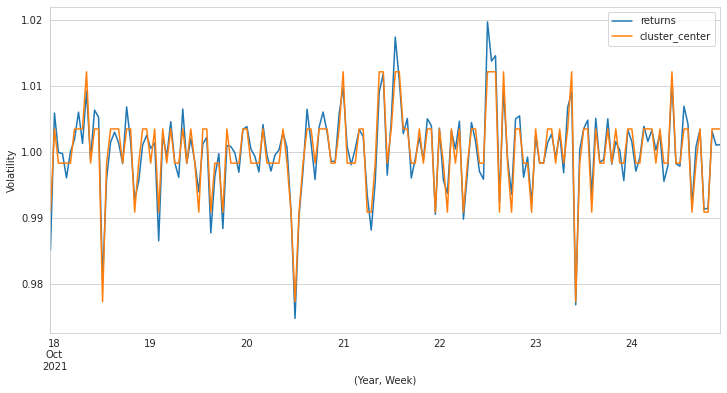

In [36]:
bitcoin_prices[['returns','cluster_center']].plot(figsize=(12,6))
plt.xlabel('(Year, Week)')
plt.ylabel('Volatility')

In [37]:
d_for_clusters={}
for i in range(5):
    d_for_clusters['Cluster '+str(i)] = [list(kmeans.predict(X)).count(i),kmeans.cluster_centers_[i][0]]

In [38]:
pd.DataFrame(d_for_clusters,columns=['Cluster '+str(i) for i in range(5)],
                       index=['Number of Points','Center'])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Number of Points,65.000000,12.000000,68.000000,20.000000,3.000000
Center,0.998262,1.012083,1.003435,0.990843,0.977297


In [39]:
d_counts={}
for k in range(5):
    for j in range(5):
        d_counts[(j,k)]=0 
L=list(kmeans.predict(X))
for i in range(len(L)-1):
    d_counts[(L[i],L[i+1])]+=1

In [40]:
prob_matrix=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        prob_matrix[i,j]+=d_counts[(i,j)]
sums=[sum(prob_matrix[i]) for i in range(5)]
for i in range(5):
    prob_matrix[i]/=sums[i]
prob_matrix=prob_matrix.round(2)*100
prob_matrix=np.char.add(prob_matrix.astype(int).astype(str),'%')
cluster_switching_probs = pd.DataFrame(prob_matrix, columns=['Cluster '+str(i) for i in range(5)],
             index=['Cluster '+str(i) for i in range(5)])
cluster_switching_probs.index.name, cluster_switching_probs.columns.name='From', 'To'
cluster_switching_probs['Center']=kmeans.cluster_centers_.round(5)
cluster_switching_probs

To,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Center
From,,,,,,
Cluster 0,37%,8%,43%,9%,3%,0.99826
Cluster 1,25%,33%,33%,8%,0%,1.01208
Cluster 2,47%,1%,37%,15%,0%,1.00344
Cluster 3,32%,5%,47%,11%,5%,0.99084
Cluster 4,0%,33%,33%,33%,0%,0.97730
